# Device Price Prediction System

## Outline

    1. Define the goal of the project.

    2. Identify the features (attributes) of the devices that will be used for classification.
    
    3. Choosing and Train the model.

    The goal of the project is to build Classification System (AI system) to predict the price range of devices based on their features.

The dataset structure.

    Dataset
        |
        |--> train - train.csv
        |--> test - test.csv

## Dataset storage explaination 

    

    Given the freedom to choose any database, I opt for SQLite due to its simplicity and compatibility with Python. SQLite offers a straightforward setup and is suitable for performing CRUD (Create, Read, Update, Delete) operations. For tasks like model training and Exploratory Data Analysis (EDA), I leverage the power of pandas. Using pandas, I can efficiently read the CSV file, perform EDA, and train the machine learning model. After processing the data, I transform it into a SQLite database, which serves as our database management system, ensuring data integrity and accessibility.

# Exploratory Data Analysis

    The data is downloaded in CSV format, making the pandas library an ideal choice for Exploratory Data Analysis (EDA). Using pandas, we can easily read the CSV file and convert it into a DataFrame. This DataFrame will serve as the foundation for preprocessing and exploring the dataset, thanks to pandas' rich set of data manipulation and analysis tools.

    Also pandas will be used to transform data to SQLite database that will be used as our database system

In [95]:
import pandas as pd
import sqlite3


    View Data: Display the first few rows of the DataFrame to get a quick overview of the data.

In [96]:
import os
# Get the current working directory
current_directory = os.getcwd()

# Join the current directory with the file path
csv_file_path_train  = os.path.join(current_directory, '..', 'Maids Project', 'Dataset', 'train - train.csv')
csv_file_path_test  = os.path.join(current_directory, '..', 'Maids Project', 'Dataset', 'test - test.csv')


# Read the CSV file into a DataFrame
df_train = pd.read_csv(csv_file_path_train,header=0)
df_test = pd.read_csv(csv_file_path_test,header=0)




# Connect to the SQLite database (creates a new database if the file doesn't exist)
conn_tr = sqlite3.connect('Dataset/train-train.db')
conn_te = sqlite3.connect('Dataset/test-test.db')


# Use pandas to insert the DataFrame contents into the SQLite database
df_train.to_sql('devices', conn_tr, if_exists='replace', index=False)
df_test.to_sql('devices', conn_te, if_exists='replace', index=False)

# Commit the changes and close the connection
conn_tr.commit()
conn_tr.close()
conn_te.commit()
conn_te.close()

# Display the the head DataFrame
df=df_train
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19,0,0,1,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0,2
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0,1


## Dataset features:
    -The training data contains 21 feartures are as follows
    
    ■ id - ID

    ■ battery_power -  Total energy a battery can store in one time measured in mAh

    ■ blue - Has Bluetooth or not

    ■ clock_speed - The speed at which the microprocessor executes instructions

    ■ dual_sim - Has dual sim support or not

    ■ fc - Front Camera megapixels

    ■ four_g - Has 4G or not

    ■ int_memory - Internal Memory in Gigabytes

    ■ m_dep - Mobile Depth in cm

    ■ mobile_wt - Weight of mobile phone

    ■ n_cores - Number of cores of the processor

    ■ pc - Primary Camera megapixels

    ■ px_height - Pixel Resolution Height

    ■ px_width - Pixel Resolution Width

    ■ ram - Random Access Memory in Megabytes

    ■ sc_h - Screen Height of mobile in cm

    ■ sc_w - Screen Width of mobile in cm

    ■ talk_time - longest time that a single battery charge will last when you are

    ■ three_g - Has 3G or not

    ■ touch_screen - Has touch screen or not

    ■ wifi - Has wifi or not

    ■ price_range - This is the target variable with the value of:

    ● 0 (low cost)

    ● 1 (medium cost)

    ● 2 (high cost)

    ● 3 (very high cost)

In [97]:
# The train  size
print(f'The train size is {df.shape}')
print(f'Types of attributes are :\n{df.dtypes}')

The train size is (2000, 21)
Types of attributes are :
battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc               float64
four_g           float64
int_memory       float64
m_dep            float64
mobile_wt        float64
n_cores          float64
pc               float64
px_height        float64
px_width         float64
ram              float64
sc_h             float64
sc_w             float64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object


    As shown all features are numerical values

    To deeply understand the data characteristics and summarize statistics for numerical columns, we will utilize the DataFrame's capabilities. This will provide insights into the dataset's distribution, central tendencies, and variability, aiding in our understanding and choosing of the model.

In [98]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,1995.000000,1995.000000,1995.000000,1995.000000,1996.000000,1996.000000,...,1996.000000,1998.000000,1998.000000,1999.000000,1999.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.310276,0.521303,32.048120,0.502256,140.266533,4.518036,...,644.651804,1251.287788,2124.262262,12.303652,5.766383,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.335766,0.499671,18.146476,0.288530,35.384676,2.288946,...,443.355443,432.352930,1085.273372,4.212373,4.357400,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.000000,874.250000,1206.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2147.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3065.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


    1. The presence of missing values in certain attributes is noted in the count row. Addressing this issue is crucial during the preprocessing step to ensure the integrity of the dataset.

    2. The wide range of statistics such as mean, standard deviation, minimum, maximum, and median (50th percentile) across attributes indicates significant variability in the dataset. This variability can potentially impact the accuracy of our predictive models and will need to be carefully managed.

    3. The 25th percentile value of 851.75 in the battery_power column indicates that 25% of the values in this column are less than or equal to this value.

    4. Similarly, the 75th percentile value of 1615.25 in the battery_power column indicates that 75% of the values are less than or equal to this value.

    Visualizing histograms for each attribute provides a clear understanding of the distribution of values across the dataset. This graphical representation helps in identifying patterns, outliers, and the overall shape of the data

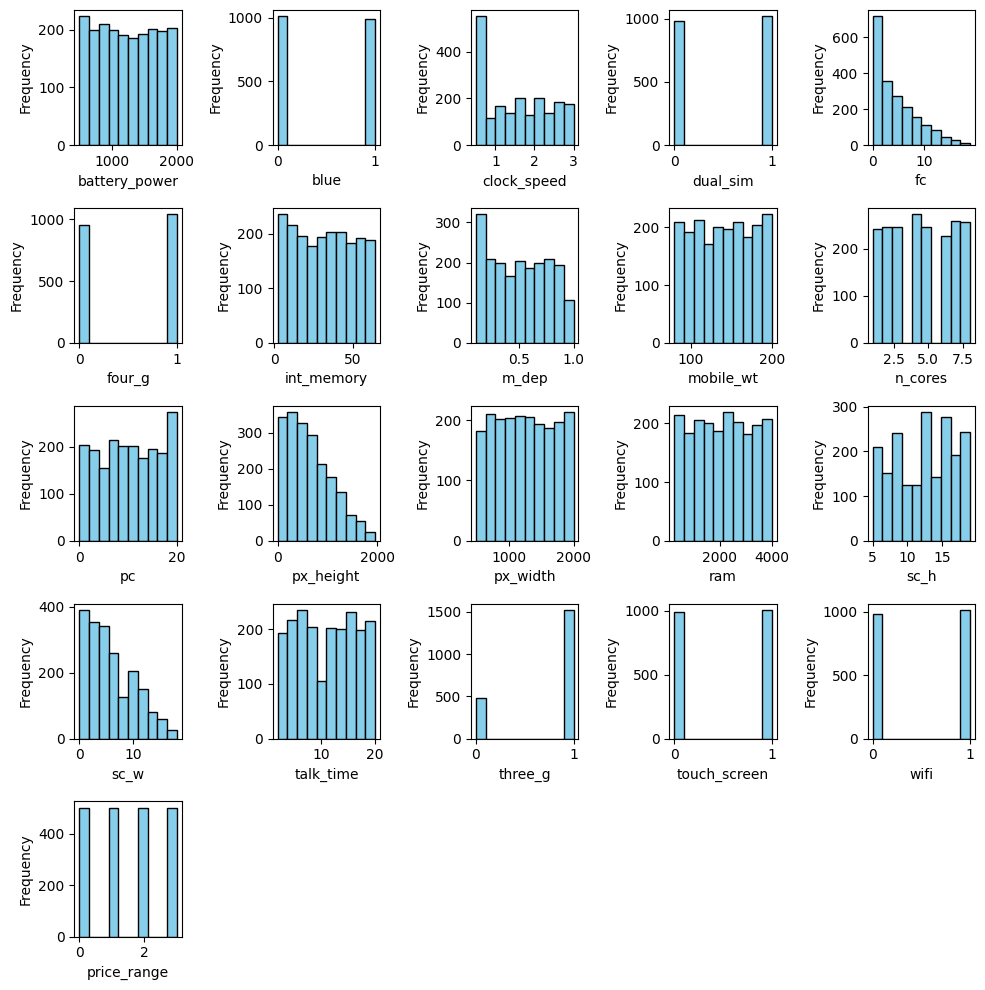

In [99]:
# Create a histogram
import matplotlib.pyplot as plt
# Set the figure size (width, height) in inches
plt.figure(figsize=(10, 10))

# Loop through each column and create a histogram
for i, col in enumerate(df.columns):
    plt.subplot(5, 5, i + 1)
    plt.hist(df[col], bins=10, color='skyblue', edgecolor='black')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Adjust the layout
plt.tight_layout()

# Display the plot
plt.show()

#### Insights from previous figure
    
    Certain features such as 'three_g', 'touch_screen', 'wifi', 'dual_sim', 'blue', and 'four_g' are represented as binary values (0 or 1), where 1 indicates the presence of the feature and 0 indicates absence.

    The scale of features varies; for example, 'm_dep' has a scale from 0 to 1, while 'battery_power' has a scale from 0 to 2000. Normalizing or standardizing these features to a consistent scale will be necessary during the preprocessing step to ensure fair comparisons.

    The 'fc' feature exhibits skewness, which may require transformation to achieve a more symmetrical distribution and improve model performance.

    The target variable 'price_range' is categorized into four categories. The goal of our mission is to predict the price range of the device based on the given specifications, making this a multiclass classification problem.

    The second step in Exploratory Data Analysis (EDA) involves identifying correlations to understand which features contribute most significantly to the 'price_range'. This analysis helps us uncover relationships between variables and determine which features are most influential in predicting the price range of the device

In [100]:
# Calculate the correlation matrix
corr_matrix = df.corr()
# Sort the correlation matrix by values in descending order
corr_matrix['price_range'].sort_values(ascending=False)



price_range      1.000000
ram              0.917119
battery_power    0.200723
px_width         0.166094
px_height        0.148184
int_memory       0.042589
sc_w             0.038777
pc               0.034639
fc               0.024999
three_g          0.023611
sc_h             0.023300
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.015494
n_cores          0.004598
m_dep           -0.000083
clock_speed     -0.006606
touch_screen    -0.030411
mobile_wt       -0.032457
Name: price_range, dtype: float64

    The correlation analysis reveals that the 'ram' feature has the strongest positive correlation (0.917) with the 'price_range', indicating that it significantly impacts the mobile device's price. This finding emphasizes the importance of the 'ram' feature in predicting the price range and will be a crucial factor to consider during model training.

# Data Preprocessing 

    Handling Missing Values is the first step in the preprocessing phase. It involves identifying and addressing any missing or null values in the dataset. There are several methods to handle missing values, including imputation, removal of rows or columns with missing values, or using algorithms that can handle missing values directly.

    Given our previous insight that missing values are very small compared to the dataset size, the best approach is to simply drop the instances corresponding to these missing values. This ensures that our analysis is not skewed by the presence of missing data and maintains the integrity of the dataset.

In [101]:
# display missing values
print(df.isnull().sum())

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               5
four_g           5
int_memory       5
m_dep            5
mobile_wt        4
n_cores          4
pc               5
px_height        4
px_width         2
ram              2
sc_h             1
sc_w             1
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


    As shown, the highest number of missing values is 5, which represents only 0.25% of the total dataset size (5 * 100 / 2000). Therefore, the best option is to drop these rows, as it will have minimal impact on the overall dataset size and ensures that our analysis is not significantly affected by missing values.

In [102]:
# Remove rows with missing values
df_clean = df.dropna(axis=0)
print(f'The shape after dropping misiing value is {df_clean.shape}')

The shape after dropping misiing value is (1991, 21)


### Data Normaliztion 

    Normalizing the features ensures that they are on a similar scale, which can help the model converge faster during training. This step is crucial for improving the model's performance and stability, especially when features have different scales or units.

For the normalization process, we will utilize the MinMaxScaler module from the sklearn library, a powerful tool in machine learning. The formula for Min-Max scaling, also known as normalization, is given by:

Xscaled = X−Xmin / Xmax−Xmin 

where:

    X is the original feature value,
    Xmin​ is the minimum value of the feature in the dataset,
    Xmax​ is the maximum value of the feature in the dataset, and
    Xscaled​ is the normalized feature value.

This formula scales the feature values to a range between 0 and 1, with 0 corresponding to the minimum value in the dataset and 1 corresponding to the maximum value. Using this approach ensures that all features are on a similar scale, which can help the model converge faster during training.

In [103]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# We will normalize only the features (X), 
# As the target variable (Y) does not need to be scaled.
# Since this is a classification problem, scaling the target variable is unnecessary and could potentially lead to issues in the model's performance.
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df_clean.iloc[:, :-1])

# Convert the normalized data back to a DataFrame
normalized_df = pd.DataFrame(normalized_data, columns=df.iloc[:, :-1].columns)
normalized_df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1991.000000,1991.000000,1991.00000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000
mean,0.492499,0.496233,0.40898,0.510799,0.226731,0.520844,0.485070,0.446677,0.502193,0.502332,0.495455,0.328980,0.501412,0.499100,0.521992,0.320805,0.500084,0.760924,0.501758,0.505274
std,0.293681,0.500111,0.32620,0.500009,0.228407,0.499691,0.292551,0.320691,0.294990,0.327322,0.303051,0.225995,0.288334,0.289966,0.300933,0.242077,0.303604,0.426626,0.500123,0.500098
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.234135,0.000000,0.08000,0.000000,0.052632,0.000000,0.225806,0.111111,0.241667,0.285714,0.250000,0.144133,0.250668,0.254142,0.285714,0.111111,0.222222,1.000000,0.000000,0.000000
50%,0.483634,0.000000,0.40000,1.000000,0.157895,1.000000,0.483871,0.444444,0.508333,0.428571,0.500000,0.287755,0.498665,0.505345,0.500000,0.277778,0.500000,1.000000,1.000000,1.000000
75%,0.744489,1.000000,0.68000,1.000000,0.368421,1.000000,0.741935,0.777778,0.750000,0.857143,0.750000,0.483418,0.756342,0.750668,0.785714,0.500000,0.777778,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


    We can observe that the scales of the features are very close to each other, which is beneficial for the model's convergence speed. This similarity in scale reduces the risk of certain features dominating others during the training process, leading to a more stable and efficient model convergence.

    Check skweness 

In [104]:
skewness = normalized_df.skew()

# Display the skewness value
print("Skewness : \n", skewness)

Skewness : 
 battery_power    0.031851
blue             0.015080
clock_speed      0.177621
dual_sim        -0.043237
fc               1.018337
four_g          -0.083511
int_memory       0.056349
m_dep            0.087387
mobile_wt        0.003900
n_cores          0.007925
pc               0.021024
px_height        0.662986
px_width         0.015752
ram              0.006836
sc_h            -0.098481
sc_w             0.633236
talk_time        0.013605
three_g         -1.224428
touch_screen    -0.007037
wifi            -0.021112
dtype: float64


    We can observe that skewness has been effectively handled, as no values are greater than +1 or less than -1. This indicates that the data distribution is more symmetrical, which can lead to improved model performance and reliability.

# Train the model

I chose the Support Vector Machine (SVM) model for several reasons. 

Firstly, the dataset contains 21 features, indicating a high-dimensional space where relationships between features and the target variable may be complex. SVMs are well-suited for high-dimensional datasets and can effectively capture intricate relationships.

Secondly, SVMs are capable of capturing nonlinear relationships in the data. This is crucial as other models may struggle with nonlinearities, whereas SVMs excel at finding complex decision boundaries.

Additionally, our previous insights revealed strong correlations between certain features and the target variable. SVMs support feature selection, allowing us to focus on the most relevant features and potentially improve model performance. This aligns perfectly with our goal of optimizing the model based on these insights.

Overall, the combination of SVM's ability to handle high-dimensional data, capture nonlinear relationships, and support feature selection makes it a suitable choice for this dataset.

    Drawbacks

    1. Computational Efficiency: SVMs can be computationally expensive, especially with large datasets. Training time may be a concern if your dataset is very large.  (This may not be valid as we deal with very small dataset)

    2. Scalability: While SVMs can handle high-dimensional data, they may not scale well to very large datasets with millions of samples.  (This may not be valid as we deal with very small dataset)

    In order to evaluate the performance of our model, we need to have 'Y' values that are not present in the test CSV file. Therefore, we will set aside a portion of the training data to use as a test set. This will allow us to test our model's performance on unseen data and ensure that it generalizes well.

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X = normalized_df
y = df_clean['price_range']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the SVM classifier

'''
    kernel='linear' specifies that a linear kernel should be used. 
        If we see the model performanc is low and need to capture nonlineartiy we will adhuest the kerenl to use nonliner functions

    decision_function_shape='ovr' indicates the 'one-vs-rest' strategy. 
        Due to the problem is multiclass classification task, one vs rest strategy is suitbale to train  one classifier per class.

'''
svm = SVC(kernel='linear', decision_function_shape='ovr',C =100)  # One-vs-rest strategy
svm.fit(X_train, y_train)

# Calculate training accuracy
train_accuracy = svm.score(X_train, y_train)
print(f"Training Accuracy: {train_accuracy}")

# Calculate test accuracy
test_accuracy = svm.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")



Training Accuracy: 0.9849246231155779
Test Accuracy: 0.9799498746867168


    After optimizing the SVM model without using Grid Search, we achieved a peak accuracy of 98% on the training data and 97% on the test data. This optimization process involved manually tuning the hyperparameter C over a range of values from 0.1 to 1000. Additionally, we explored different kernels, including 'poly', 'rbf', and 'linear', to identify the best-performing configuration. The final selection of hyperparameters and kernel choices was made through iterative testing and evaluation, prioritizing a balance between model complexity and generalization performance.

Confusion Matrix  

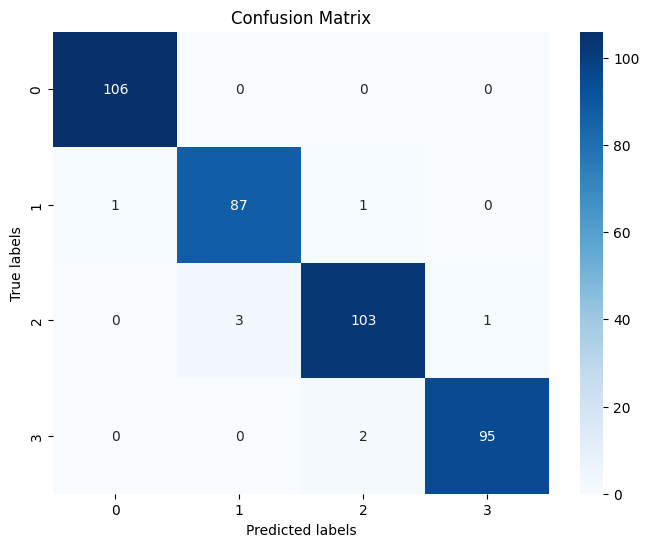

In [106]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = svm.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()


Confusion Matrix insights 


    Class 0 ( low cost ):
        True Negatives (TN): 101 instances were correctly predicted as not belonging to Class 0.
        False Positives (FP): 5 instances were incorrectly predicted as belonging to Class 0 when they actually didn't.
        False Negatives (FN): There are no false negatives for Class 0 in this confusion matrix.
        True Positives (TP): There are no true positives for Class 0 in this confusion matrix.

    Class 1 ( medium cost ):
        True Negatives (TN): There are no true negatives for Class 1 in this confusion matrix.
        False Positives (FP): 2 instances were incorrectly predicted as belonging to Class 1 when they actually didn't.
        False Negatives (FN): 6 instances were incorrectly predicted as not belonging to Class 1 when they actually did.
        True Positives (TP): 86 instances were correctly predicted as belonging to Class 1.

    Class 2 ( hight cost ):
        True Negatives (TN): 188 instances were correctly predicted as not belonging to Class 2.
        False Positives (FP): 1 instance was incorrectly predicted as belonging to Class 2 when it actually didn't.
        False Negatives (FN): 12 instances were incorrectly predicted as not belonging to Class 2 when they actually did.
        True Positives (TP): 199 instances were correctly predicted as belonging to Class 2.

    Class 3 ( very high cost ):
        True Negatives (TN): 188 instances were correctly predicted as not belonging to Class 3.
        False Positives (FP): 1 instance was incorrectly predicted as belonging to Class 3 when it actually didn't.
        False Negatives (FN): 12 instances were incorrectly predicted as not belonging to Class 3 when they actually did.
        True Positives (TP): 199 instances were correctly predicted as belonging to Class 3.

# Save and Load the model 

In [107]:
from joblib import dump, load

# Assuming svm is your trained SVM model
dump(svm, 'svm_model.joblib')


['svm_model.joblib']

    Load the model and read records from database to make prediction on the first 10th records

In [108]:
# Connect to the SQLite database
conn = sqlite3.connect('Dataset/test-test.db')

# Load the data from the database
query = "SELECT * FROM devices;"
df = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Load the saved SVM model
svm_loaded = load('svm_model.joblib')

# Fit the MinMaxScaler to all records in the DataFrame
scaler = MinMaxScaler()
scaler.fit(df.drop(df.columns[0], axis=1))  # Exclude the ID column

# Prepare the new data for prediction
X_new = df.drop(df.columns[0], axis=1)

# Make predictions for the first 10 devices
predictions = svm_loaded.predict(scaler.transform(X_new.iloc[:10]))

print(f'Price ranges of the first 10 devices are {predictions}')


Price ranges of the first 10 devices are [3 3 2 3 1 3 3 1 3 0]


/home/ahmed/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
